In [59]:
#importing dataset
from google.colab import drive
import pandas as pd
import numpy as np

In [60]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


dataset link- https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset

In [61]:
df_train=pd.read_csv('/content/drive/My Drive/deployment/train.csv')

In [62]:
df_test=pd.read_csv('/content/drive/My Drive/deployment/test.csv')


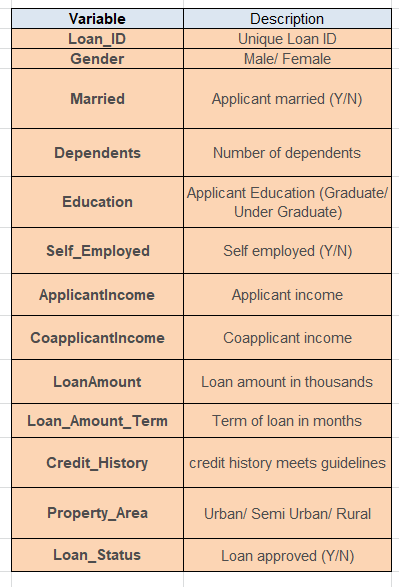

1] **Loan ID** -> As the name suggests each person should have a unique loan ID.

2] **Gender** -> In general it is male or female. No offence for not including the third gender.

3] **Married** -> Applicant who is married is represented by Y and not married is represented as N. The information regarding whether the applicant who is married is divorced or not has not been provided. So we don’t need to worry regarding all these.

4] **Dependents** -> the number of people dependent on the applicant who has taken loan has been provided.

5] **Education** -> It is either non -graduate or graduate. The assumption I can make is “ The probability of clearing the loan amount would be higher if the applicant is a graduate”.

6] **Self_Employed** -> As the name suggests Self Employed means , he/she is employed for himself/herself only. So freelancer or having a own business might come in this category. An applicant who is self employed is represented by Y and the one who is not is represented by N.

7] **Applicant Income** -> Applicant Income suggests the income by Applicant.So the general assumption that i can make would be “The one who earns more have a high probability of clearing loan amount and would be highly eligible for loan ”

8] **Co Applicant income** -> this represents the income of co-applicant. I can also assume that “ If co applicant income is higher , the probability of being eligible would be higher 

9] **Loan Amount** -> This amount represents the loan amount in thousands. One assumption I can make is that “ If Loan amount is higher , the probability of repaying would be lesser and vice versa”

10] **Loan_Amount_Term** -> This represents the number of months required to repay the loan.

11] **Credit_History** -> When I googled it , I got this information. A credit history is a record of a borrower’s responsible repayment of debts. It suggests → 1 denotes that the credit history is good and 0 otherwise.

12] **Property_Area** -> The area where they belong to is my general assumption as nothing more is told. Here it can be three types. Urban or Semi Urban or Rural

13] 
**Loan_Status** -> If the applicant is eligible for loan it’s yes represented by Y else it’s no represented by N.

In [63]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [64]:
#filling NA values
df_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [65]:
df_train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [66]:
df_train['Gender'].fillna('Male',inplace=True)

In [67]:
df_train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [68]:
df_train['Married'].fillna('Yes',inplace=True)

In [69]:
df_train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [70]:
df_train['Dependents'].fillna('0',inplace=True)

In [71]:
df_train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [72]:
df_train['Self_Employed'].fillna('No',inplace=True)

In [73]:
df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean(),inplace=True)
           

In [74]:
df_train['Loan_Amount_Term'].value_counts()
     

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [75]:
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mean(),inplace=True)

In [76]:
df_train['Credit_History'].value_counts()
       

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [77]:
df_train['Credit_History'].fillna(df_train['Credit_History'].mean(),inplace=True)

In [78]:
df_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [79]:
df_train['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [80]:
df_train['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [81]:
df_train.drop(['Loan_ID'],inplace=True,axis=1)
df_test.drop(['Loan_ID'],inplace=True,axis=1)

In [82]:
train_x=df_train.iloc[0:,:11]
train_y=df_train.iloc[:,11: ]

In [83]:
def fun(x):
  if x=='0':
    return 0
  if x=='1':
    return 1
  if x=='2':
    return 2
  if x=='3+':
    return 3

In [84]:
train_x['Dependents']=train_x['Dependents'].apply(fun)
df_test['Dependents']=df_test['Dependents'].apply(fun)

In [85]:
#converting nominal column into numerical
columns=['Gender','Married','Education','Self_Employed','Property_Area']
for c in columns:
  x=pd.get_dummies(train_x[c],drop_first=True)
  train_x.drop(c,axis=1,inplace=True)
  train_x=pd.concat([train_x,x],axis=1)
  x=pd.get_dummies(df_test[c],drop_first=True)
  df_test.drop(c,axis=1,inplace=True)
  df_test=pd.concat([df_test,x],axis=1)

In [86]:
train_x

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Yes,Not Graduate,Yes,Semiurban,Urban
0,0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,1
1,1,4583,1508.0,128.000000,360.0,1.0,1,1,0,0,0,0
2,0,3000,0.0,66.000000,360.0,1.0,1,1,0,1,0,1
3,0,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,0,1
4,0,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.000000,360.0,1.0,0,0,0,0,0,0
610,3,4106,0.0,40.000000,180.0,1.0,1,1,0,0,0,0
611,1,8072,240.0,253.000000,360.0,1.0,1,1,0,0,0,1
612,2,7583,0.0,187.000000,360.0,1.0,1,1,0,0,0,1


In [87]:
cnt=1
new_col=[]
for c in train_x.columns:
  if c=='Yes':
    new_col.append(c+str(cnt))
    cnt=cnt+1
  else:
    new_col.append(c)
train_x.columns=new_col
df_test.columns=new_col




In [88]:
train_x.rename(columns={'Yes1':'Married', 'Yes2':'Self_Employed'},inplace=True)
df_test.rename(columns={'Yes1':'Married', 'Yes2':'Self_Employed'},inplace=True)

In [89]:
train_x

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Married,Not Graduate,Self_Employed,Semiurban,Urban
0,0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,1
1,1,4583,1508.0,128.000000,360.0,1.0,1,1,0,0,0,0
2,0,3000,0.0,66.000000,360.0,1.0,1,1,0,1,0,1
3,0,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,0,1
4,0,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.000000,360.0,1.0,0,0,0,0,0,0
610,3,4106,0.0,40.000000,180.0,1.0,1,1,0,0,0,0
611,1,8072,240.0,253.000000,360.0,1.0,1,1,0,0,0,1
612,2,7583,0.0,187.000000,360.0,1.0,1,1,0,0,0,1


In [90]:
def func(x):
  if x=='Y':
    return 1
  if x=='N':
    return 0

In [91]:
train_y['Loan_Status']=train_y['Loan_Status'].apply(func)

In [92]:
from sklearn.metrics import accuracy_score
import pickle
from sklearn.externals import joblib

In [93]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
model=LogisticRegression()

In [96]:
model.fit(train_x,train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [97]:
joblib.dump(model,open('model.pkl','wb'))